In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["MedHouseVal"] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
from sklearn.preprocessing import MinMaxScaler

features = df.columns.tolist()[:-1]
scaler = MinMaxScaler().fit(df[features])
df[features]  = scaler.transform(df[features])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    df[features],
    df["MedHouseVal"], 
    test_size=0.2, 
    random_state=1589)

In [86]:
models = dict()

# Линейная регресия

In [87]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
models['Регрессия'] = lr

In [16]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.6046546374676416, 0.6121628326769639)

# Дерево решений

In [88]:
from sklearn.tree import DecisionTreeRegressor

tree1 = DecisionTreeRegressor(
    random_state=1589,
).fit(X_train, y_train)
models['Дерево простое']  = tree1

In [82]:
tree1.score(X_train, y_train), tree1.score(X_test, y_test)

(1.0, 0.6022751245979046)

[Text(0.5, 0.875, 'MedInc <= 0.313\nsquared_error = 1.345\nsamples = 16512\nvalue = 2.076'),
 Text(0.25, 0.625, 'MedInc <= 0.178\nsquared_error = 0.849\nsamples = 12976\nvalue = 1.739'),
 Text(0.125, 0.375, 'AveRooms <= 0.025\nsquared_error = 0.562\nsamples = 6279\nvalue = 1.359'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'AveOccup <= 0.001\nsquared_error = 0.856\nsamples = 6697\nvalue = 2.095'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'MedInc <= 0.42\nsquared_error = 1.219\nsamples = 3536\nvalue = 3.313'),
 Text(0.625, 0.375, 'AveOccup <= 0.002\nsquared_error = 0.886\nsamples = 2282\nvalue = 2.869'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'MedInc <= 0.504\nsquared_error = 0.812\nsamples = 1254\nvalue = 4.12'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

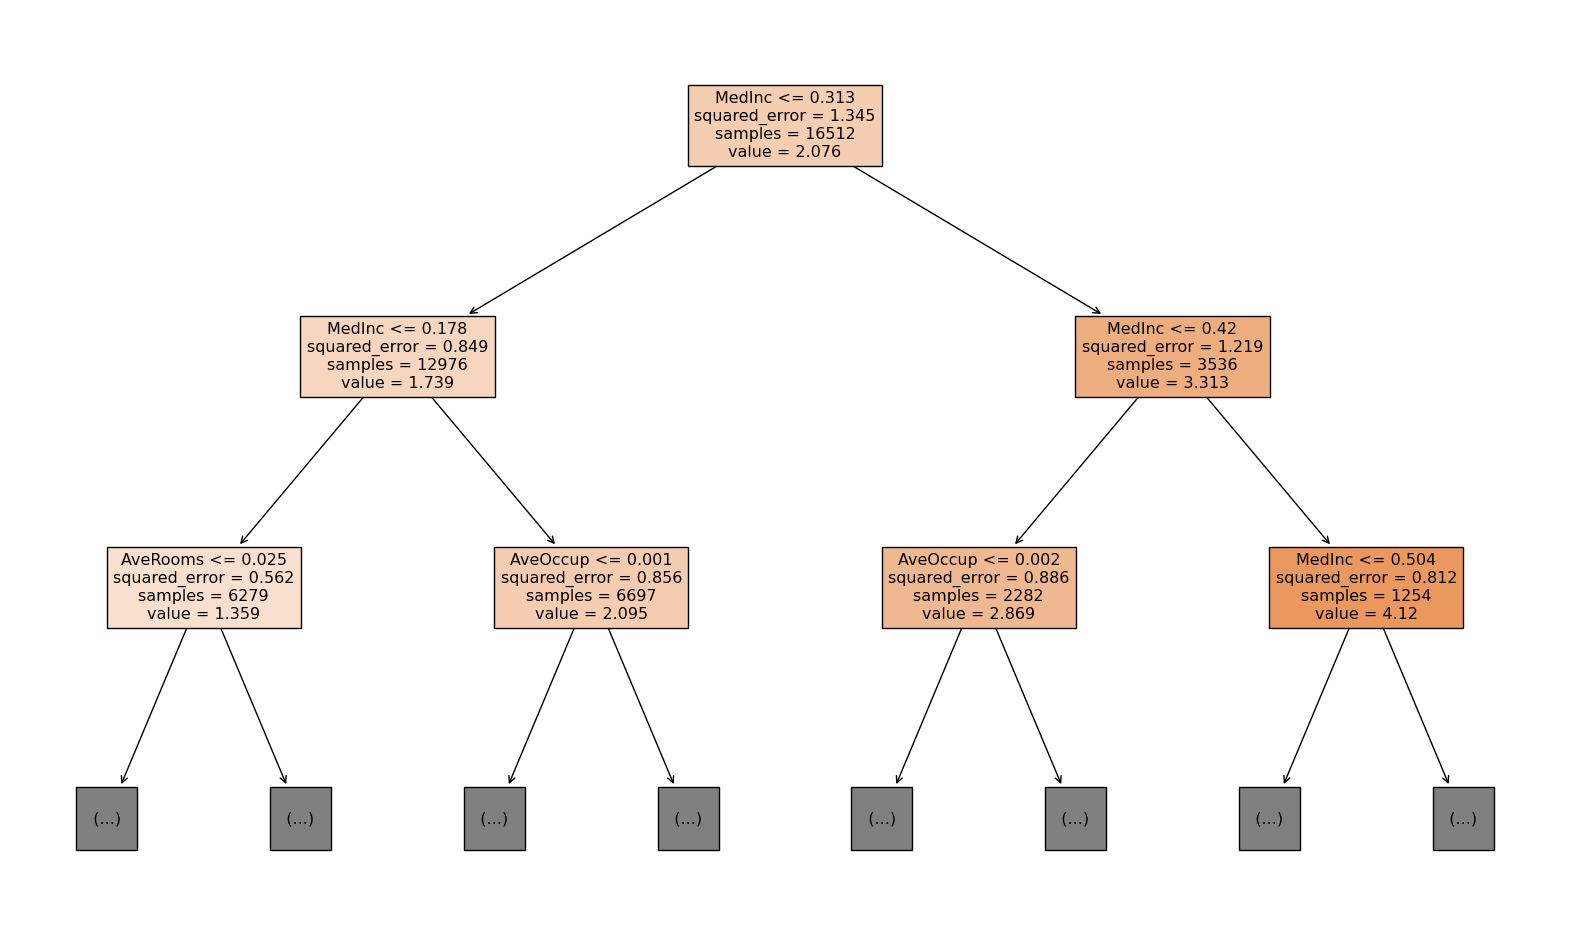

In [89]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 12))
plot_tree(
    tree1, # модель
    max_depth=2,
    feature_names=features, # имена фич
    filled=True # раскрасить узлы
)

In [91]:
tree2 = DecisionTreeRegressor(
    max_depth = 9,
    min_samples_leaf=4,
    random_state=1589,
).fit(X_train, y_train)
models['Дерево оптимизированное'] = tree2


In [92]:
tree2.score(X_train, y_train), tree2.score(X_test, y_test)

(0.7886193663710533, 0.6954026761852239)

# Итог

In [94]:
for name, model in models.items():
    print(f'Модель: {name}; Точность на тесте {model.score(X_test, y_test)}')

Модель: Регрессия; Точность на тесте 0.6121628326769639
Модель: Дерево простое; Точность на тесте 0.6022751245979046
Модель: Дерево оптимизированное; Точность на тесте 0.6954026761852239


Регрессия получилась чуть лучше, чем неоптимизированное дерево.

С помощью параметров у дерева удалось добиться лучших результатов

Если я правильно понял, регрессию лучше использовать на данных, которые имеют зависимость с целевой переменной близкую к линейной.

Деревья позволяют находить более сложные зависимости
